In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("salem.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,RH2M,PRECTOTCORR,PS,WS50M
0,2011,6,1,5,24.62,89.31,0.00,96.95,6.12
1,2011,6,1,6,25.55,84.44,0.00,97.00,5.40
2,2011,6,1,7,26.97,76.25,0.06,97.06,6.34
3,2011,6,1,8,28.66,65.25,0.08,97.09,7.02
4,2011,6,1,9,30.11,56.94,0.24,97.09,7.06
...,...,...,...,...,...,...,...,...,...
86203,2021,4,1,0,28.98,60.94,0.00,96.95,4.51
86204,2021,4,1,1,28.47,65.31,0.00,96.88,4.23
86205,2021,4,1,2,27.98,69.19,0.00,96.84,4.00
86206,2021,4,1,3,27.55,72.44,0.00,96.85,3.84


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
RH2M           0.0
PRECTOTCORR    0.0
PS             0.0
WS50M          0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS50M']


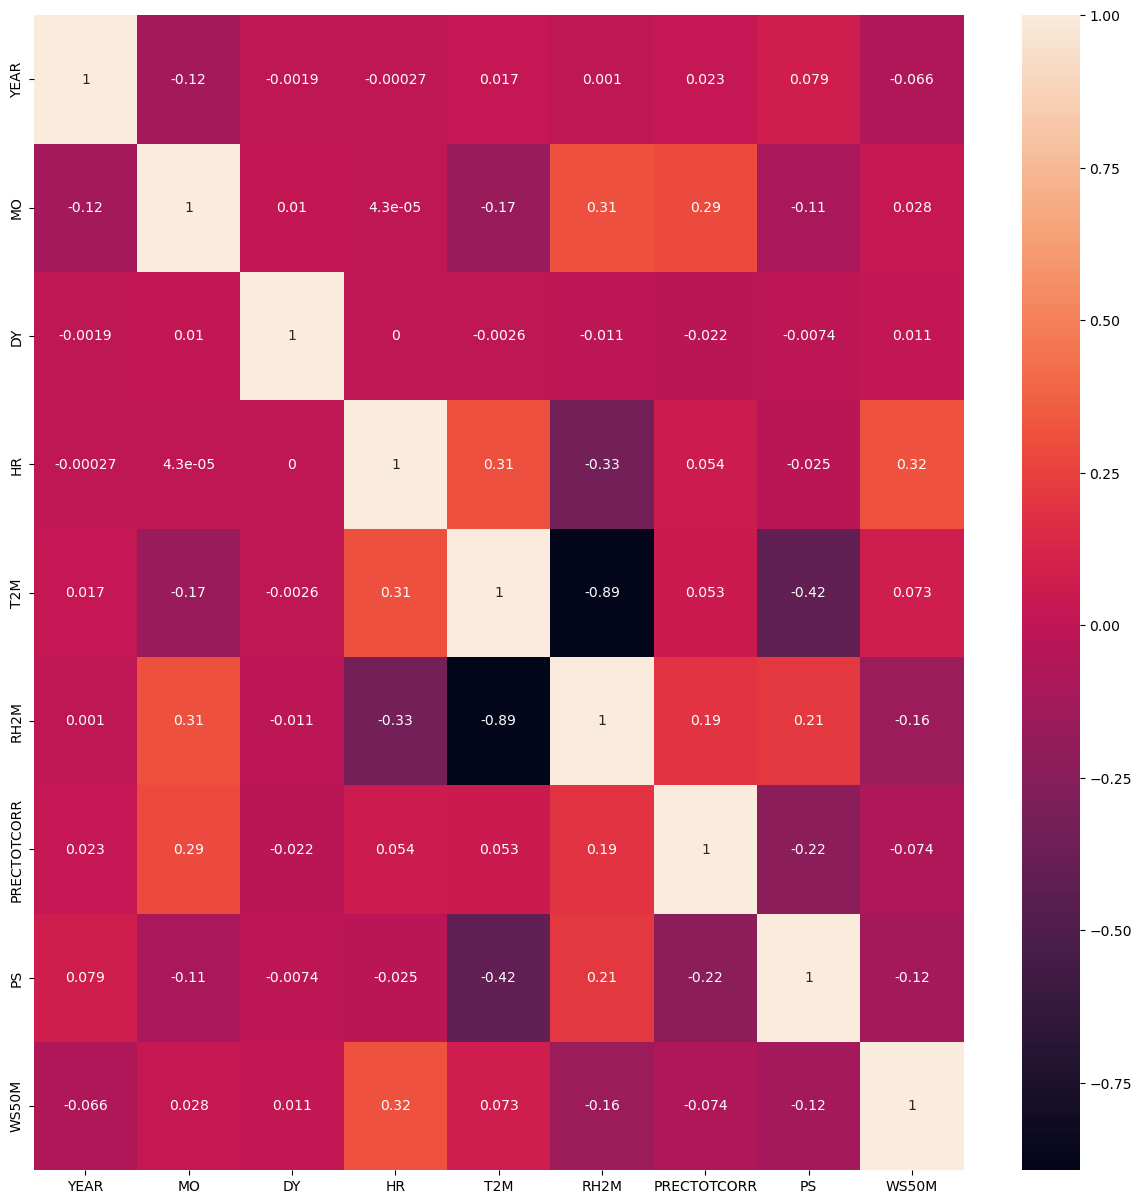

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

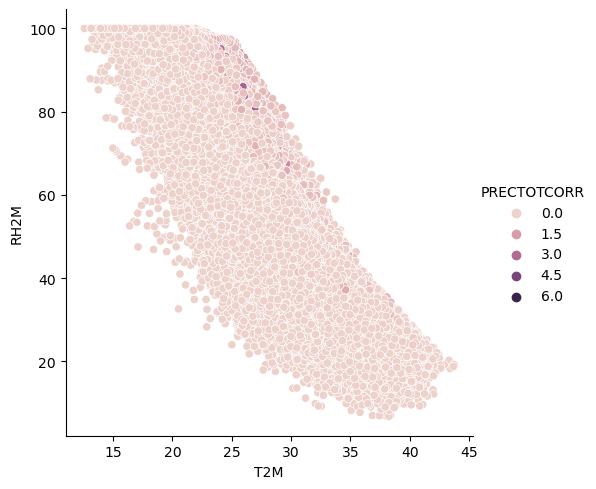

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


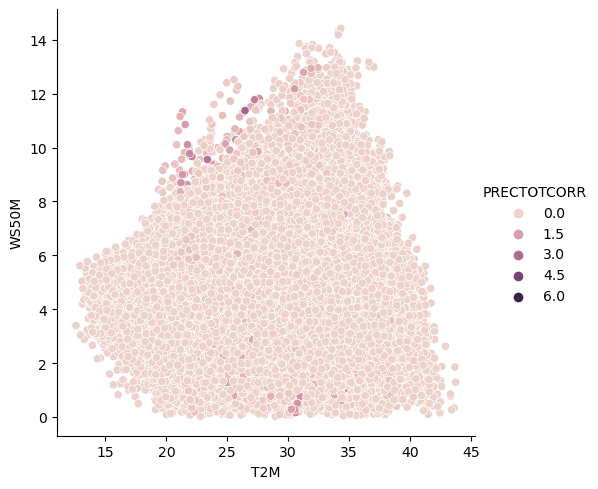

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


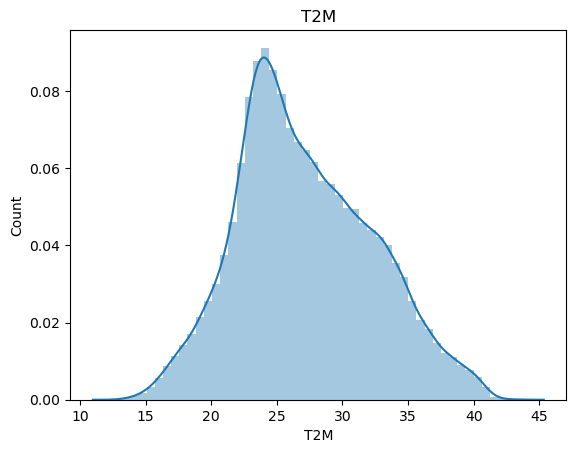

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


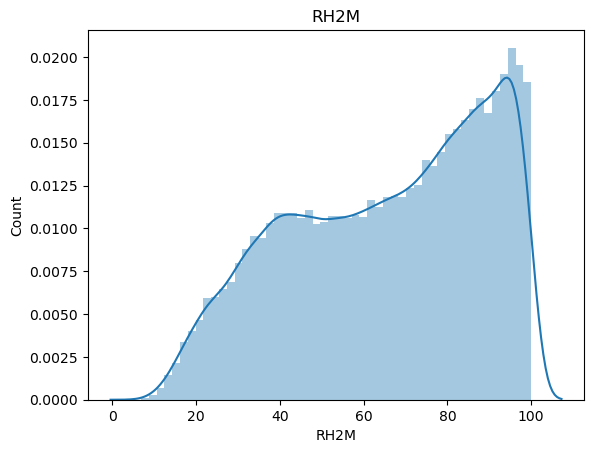

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


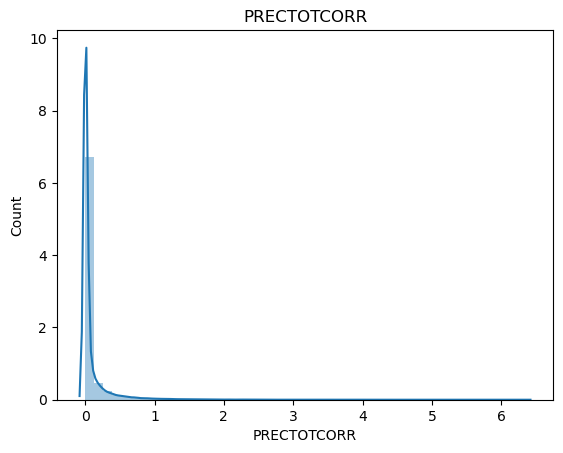

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


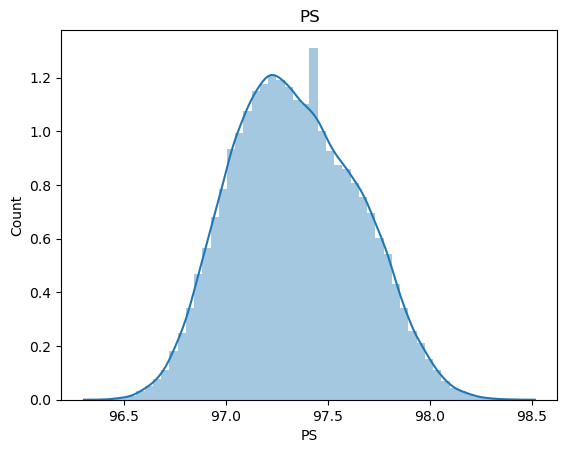

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


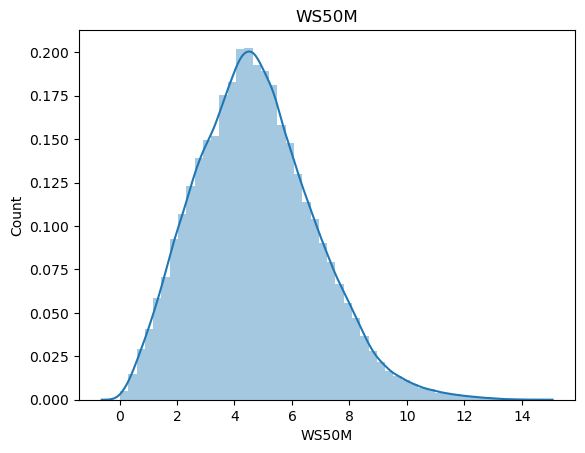

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

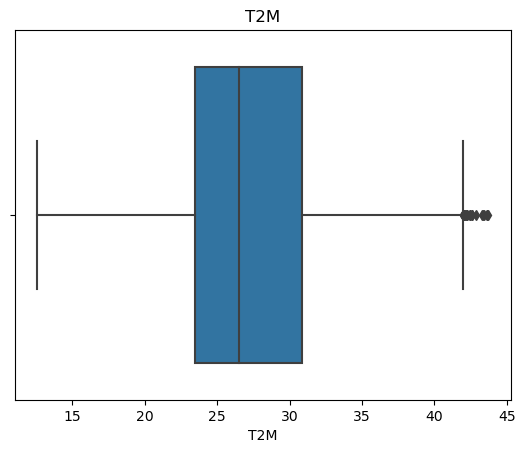

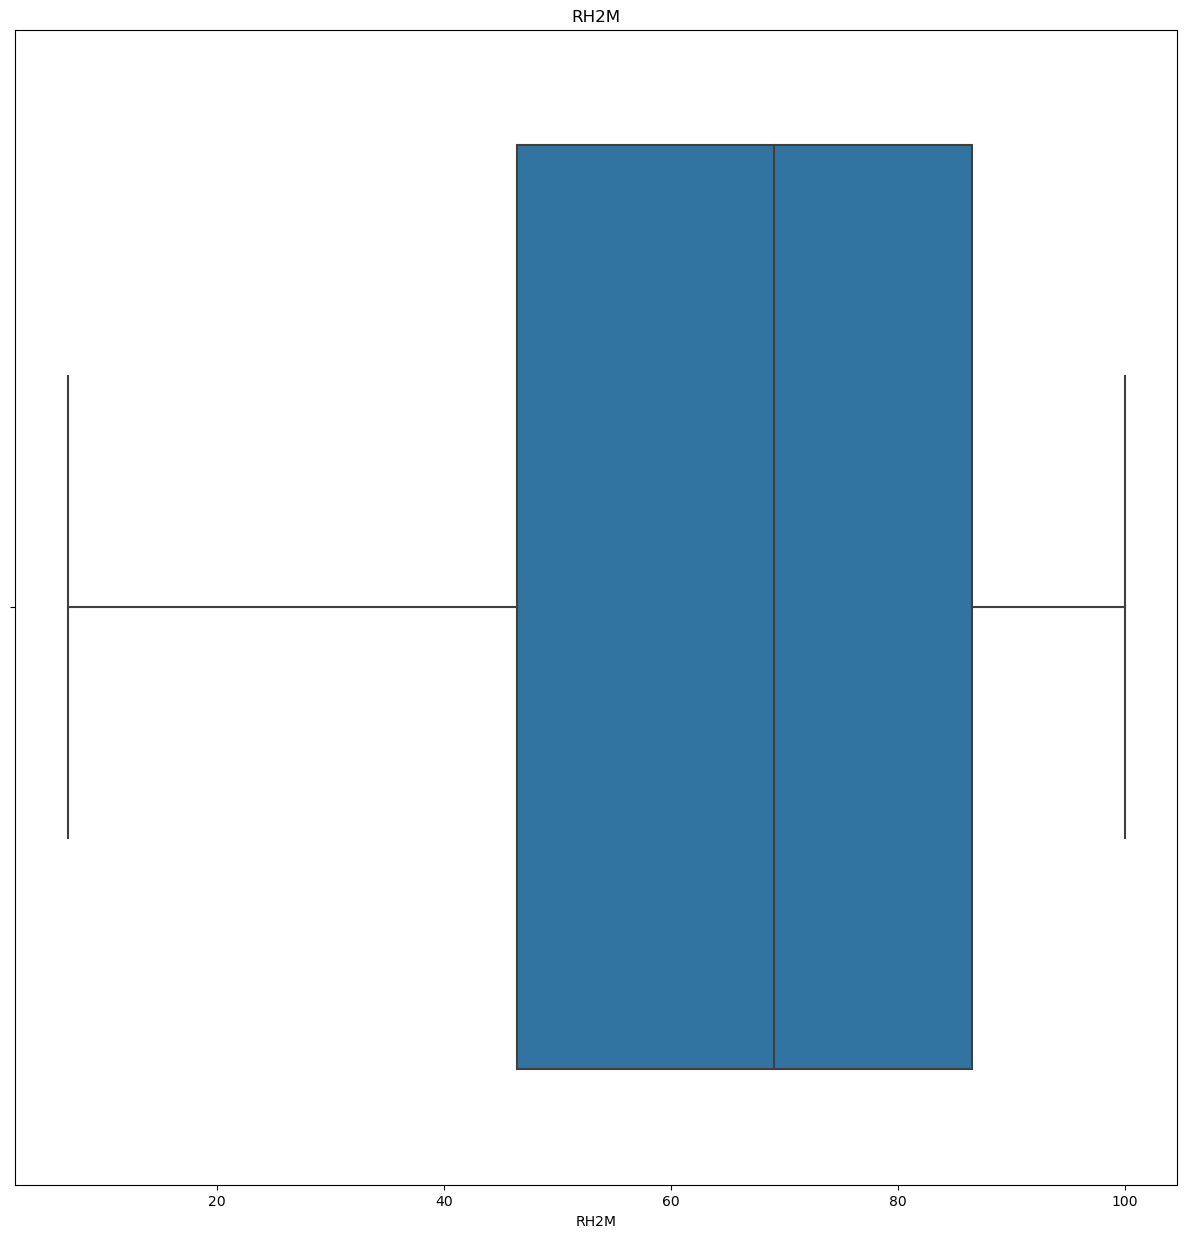

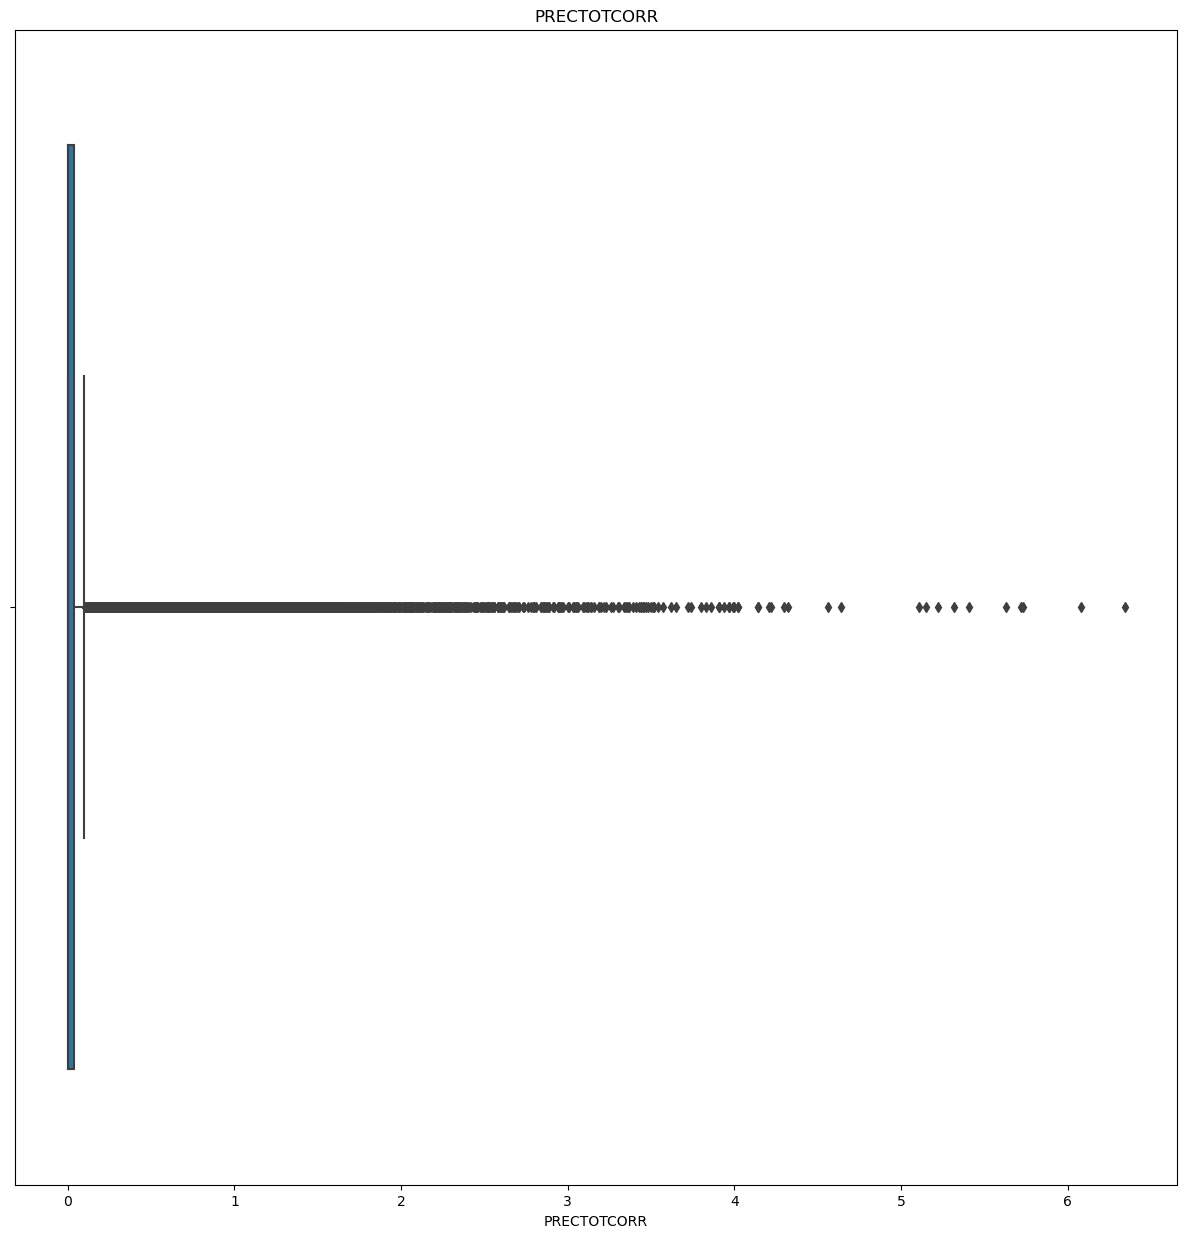

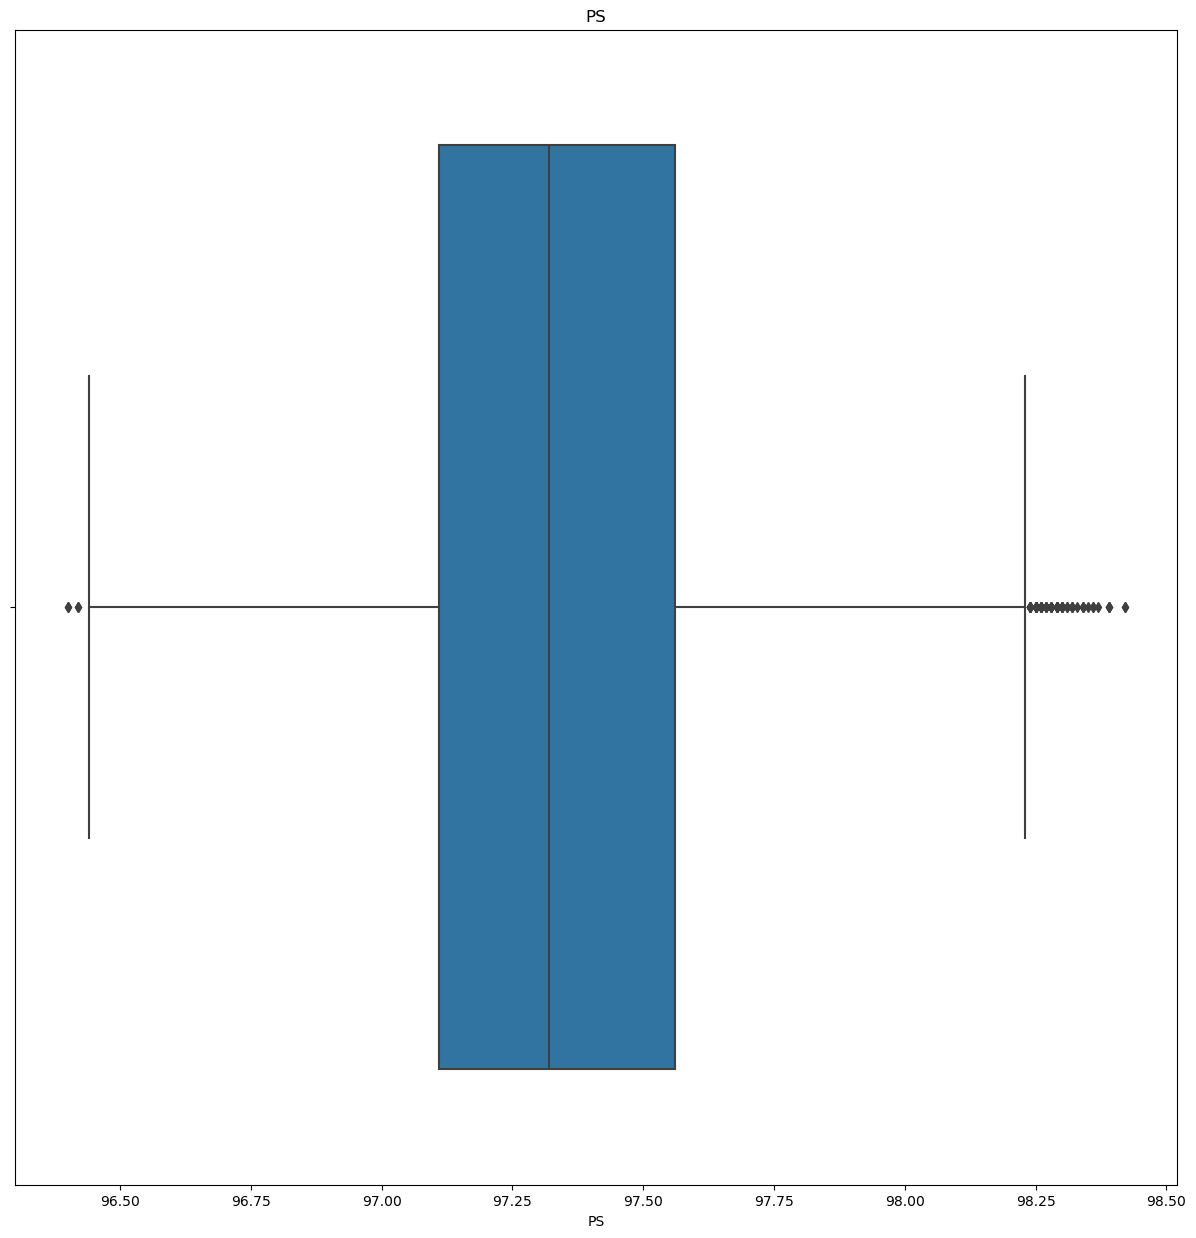

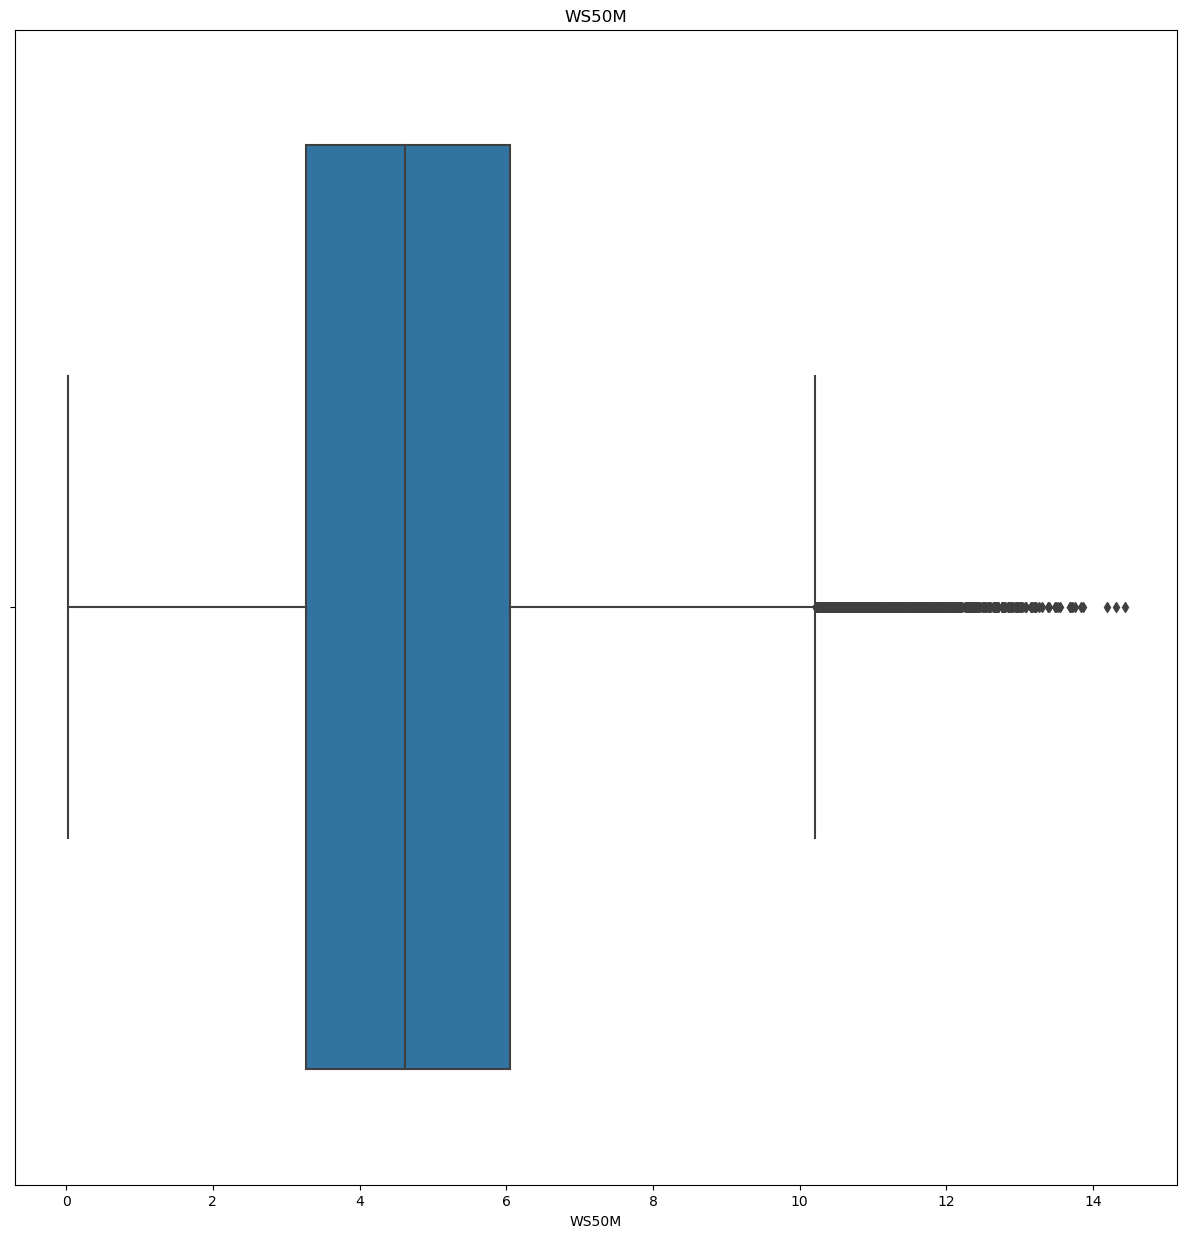

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[24.62 25.55 26.97 ... 41.55 42.13 42.  ]
<class 'numpy.ndarray'>
[0.   0.06 0.08 0.24 0.37 0.5  0.53 0.56 0.44 0.32 0.23 0.19 0.1  0.04
 0.02 0.01 0.03 0.07 0.09 0.13 0.12 0.05 0.36 0.33 0.27 0.22 0.14 0.11
 0.16 0.17 0.25 0.2  0.55 0.93 0.88 0.97 0.86 0.48 0.54 1.55 1.96 1.74
 1.7  1.64 0.81 0.99 1.04 1.17 1.2  0.87 0.57 0.29 0.28 0.39 0.4  0.47
 0.63 0.67 0.59 0.3  0.31 0.15 0.41 0.21 1.94 2.8  2.88 2.67 1.19 0.77
 0.18 0.45 0.72 0.66 0.46 0.58 0.52 0.49 0.43 0.26 0.6  0.73 0.64 0.42
 0.76 0.9  1.16 0.69 0.34 1.43 1.76 1.45 1.51 1.49 1.02 1.05 1.01 0.79
 1.23 1.62 1.36 1.13 1.29 1.54 1.48 0.91 0.51 1.18 0.82 0.78 1.3  0.8
 0.61 0.98 0.71 0.7  0.89 1.26 0.38 0.62 0.68 0.35 1.78 1.82 1.47 2.15
 3.05 3.12 2.68 2.4  2.19 1.88 1.73 1.44 1.1  1.08 1.59 1.   0.84 0.83
 1.11 2.05 3.41 3.52 1.8  1.52 1.21 1.28 0.75 0.65 1.67 1.6  1.85 3.91
 3.5  2.3  1.09 1.69 1.35 1.42 1.14 0.74 1.38 1.84 2.   1.65 2.37 2.55
 2.5  2.28 1.81 1.5  1.07 0.94 1.34 0.95 1.4  1.39 2.03 1.58 0.96 1.06
 1.33 0.92 1

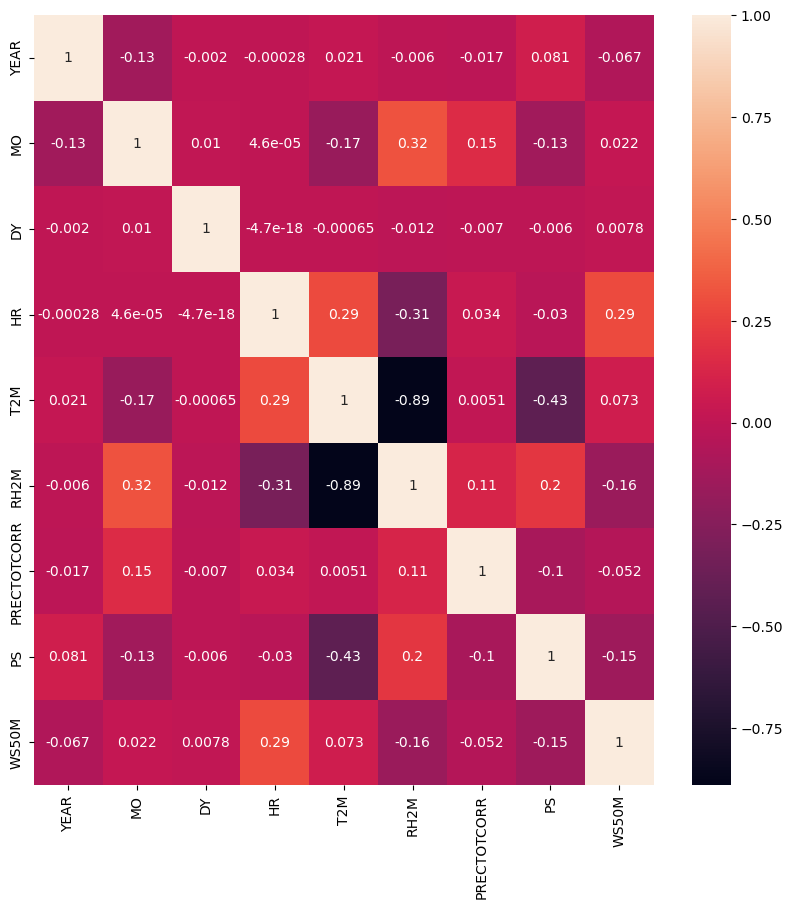

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


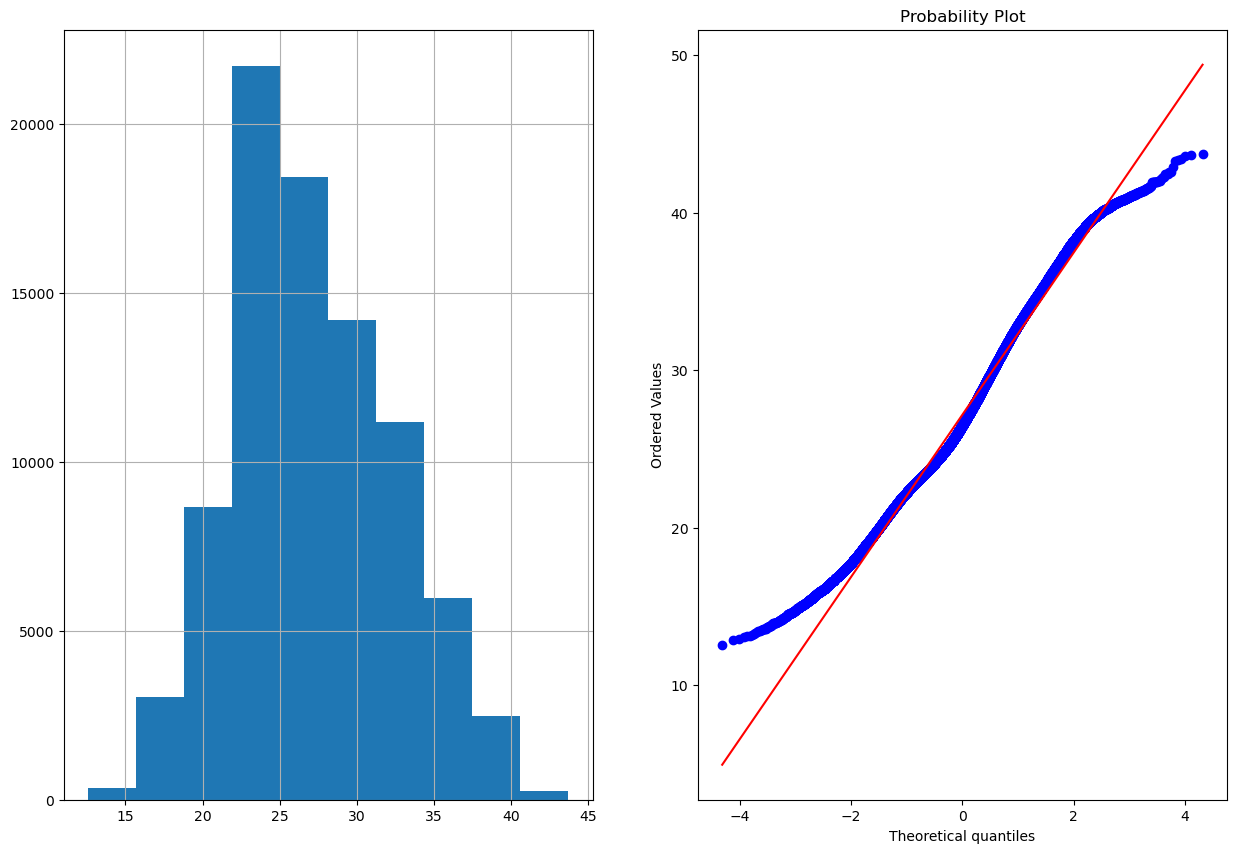

RH2M


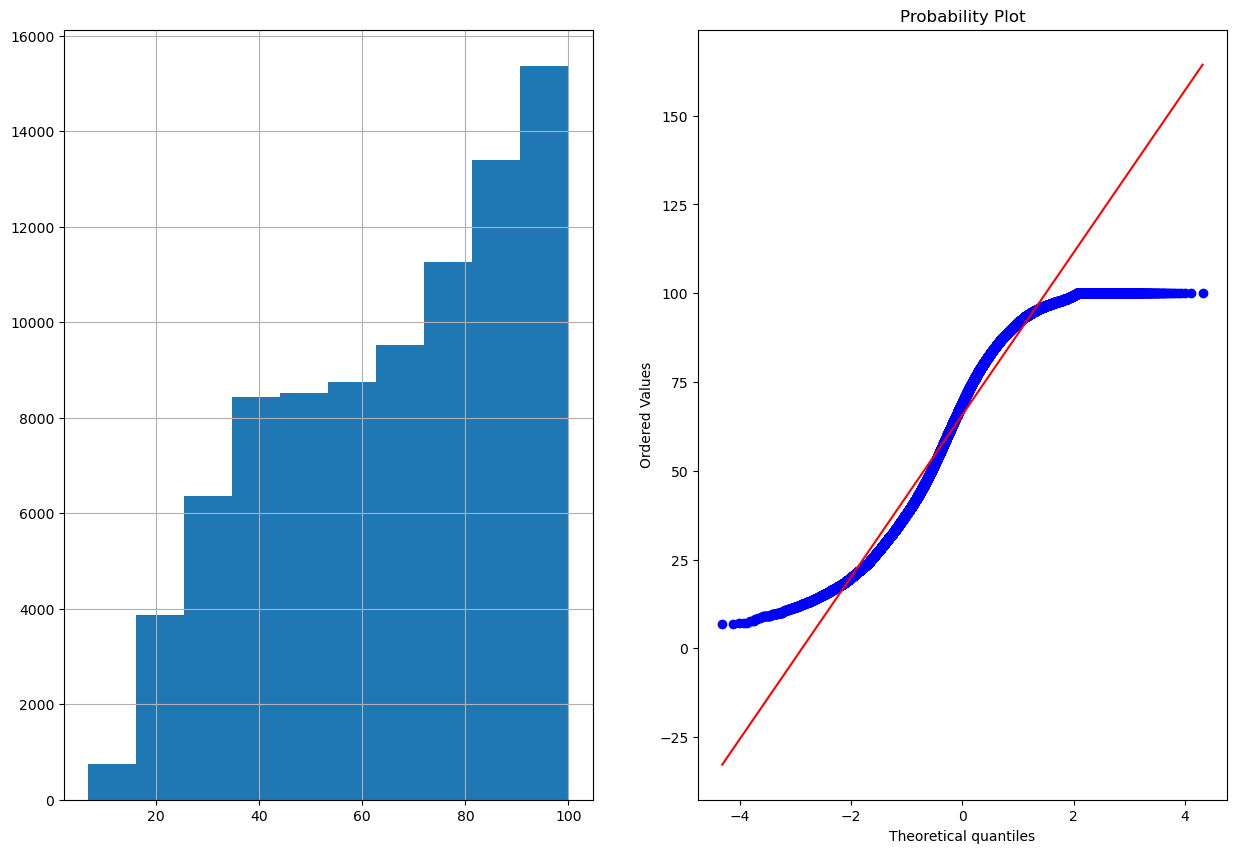

PRECTOTCORR


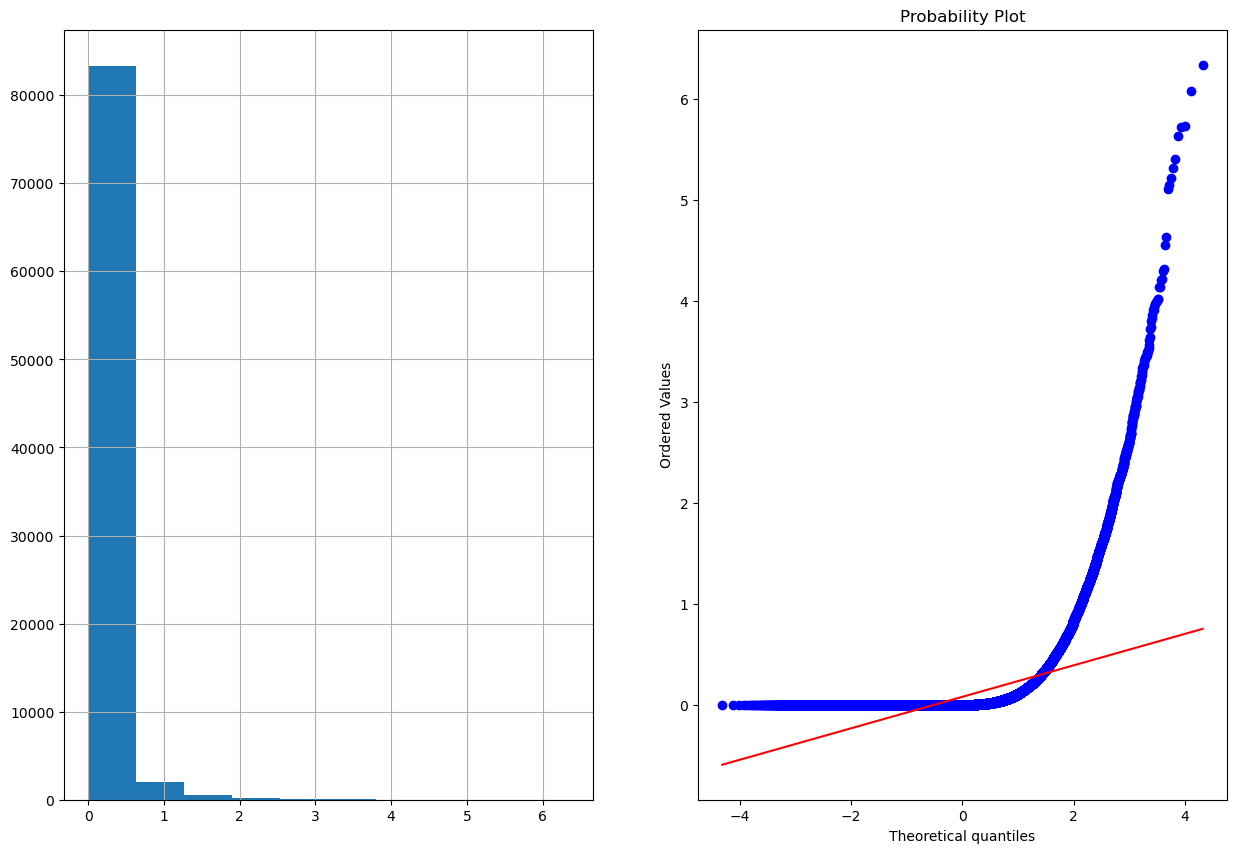

PS


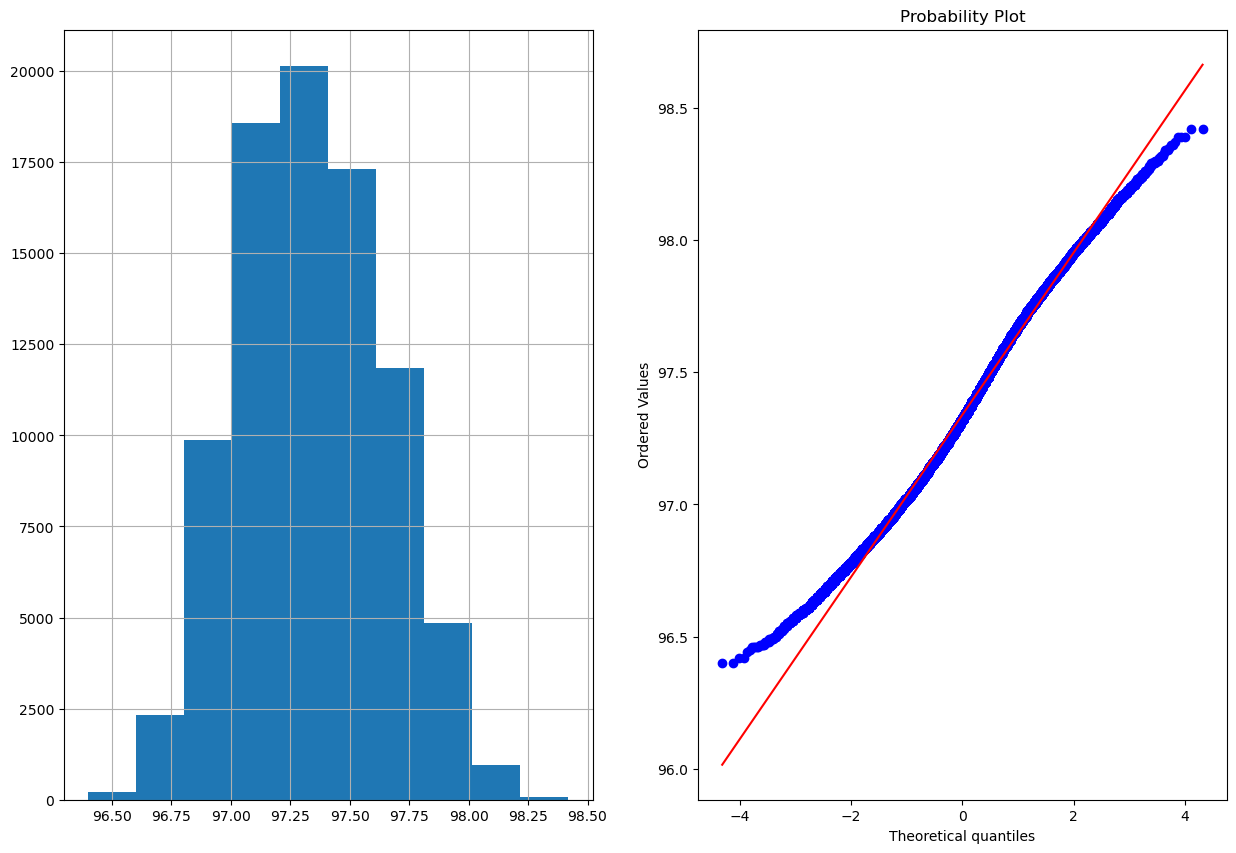

WS50M


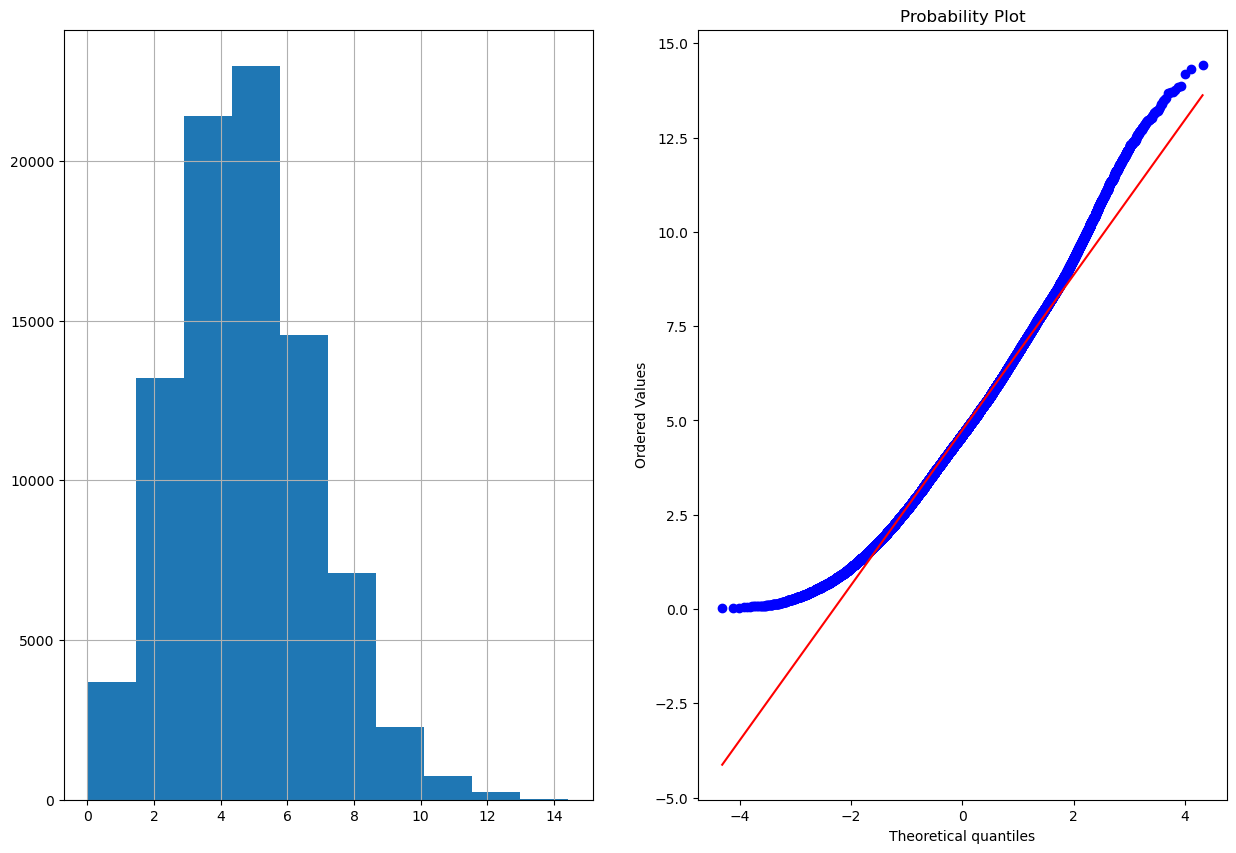

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([0.  , 0.06, 0.08, 0.24, 0.37, 0.5 , 0.53, 0.56, 0.44, 0.32, 0.23,
       0.19, 0.1 , 0.04, 0.02, 0.01, 0.03, 0.07, 0.09, 0.13, 0.12, 0.05,
       0.36, 0.33, 0.27, 0.22, 0.14, 0.11, 0.16, 0.17, 0.25, 0.2 , 0.55,
       0.93, 0.88, 0.97, 0.86, 0.48, 0.54, 1.55, 1.96, 1.74, 1.7 , 1.64,
       0.81, 0.99, 1.04, 1.17, 1.2 , 0.87, 0.57, 0.29, 0.28, 0.39, 0.4 ,
       0.47, 0.63, 0.67, 0.59, 0.3 , 0.31, 0.15, 0.41, 0.21, 1.94, 2.8 ,
       2.88, 2.67, 1.19, 0.77, 0.18, 0.45, 0.72, 0.66, 0.46, 0.58, 0.52,
       0.49, 0.43, 0.26, 0.6 , 0.73, 0.64, 0.42, 0.76, 0.9 , 1.16, 0.69,
       0.34, 1.43, 1.76, 1.45, 1.51, 1.49, 1.02, 1.05, 1.01, 0.79, 1.23,
       1.62, 1.36, 1.13, 1.29, 1.54, 1.48, 0.91, 0.51, 1.18, 0.82, 0.78,
       1.3 , 0.8 , 0.61, 0.98, 0.71, 0.7 , 0.89, 1.26, 0.38, 0.62, 0.68,
       0.35, 1.78, 1.82, 1.47, 2.15, 3.05, 3.12, 2.68, 2.4 , 2.19, 1.88,
       1.73, 1.44, 1.1 , 1.08, 1.59, 1.  , 0.84, 0.83, 1.11, 2.05, 3.41,
       3.52, 1.8 , 1.52, 1.21, 1.28, 0.75, 0.65, 1.

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([1., 0.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,24.62,1.0
1,25.55,1.0
2,26.97,0.0
3,28.66,0.0
4,30.11,0.0
...,...,...
86203,28.98,1.0
86204,28.47,1.0
86205,27.98,1.0
86206,27.55,1.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,24.62,1.0,5
1,25.55,1.0,6
2,26.97,0.0,7
3,28.66,0.0,8
4,30.11,0.0,9
...,...,...,...
86203,28.98,1.0,0
86204,28.47,1.0,1
86205,27.98,1.0,2
86206,27.55,1.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,24.62,1.0,5,1
1,25.55,1.0,6,1
2,26.97,0.0,7,1
3,28.66,0.0,8,1
4,30.11,0.0,9,1
...,...,...,...,...
86203,28.98,1.0,0,1
86204,28.47,1.0,1,1
86205,27.98,1.0,2,1
86206,27.55,1.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,24.62,1.0,5,1,6
1,25.55,1.0,6,1,6
2,26.97,0.0,7,1,6
3,28.66,0.0,8,1,6
4,30.11,0.0,9,1,6
...,...,...,...,...,...
86203,28.98,1.0,0,1,4
86204,28.47,1.0,1,1,4
86205,27.98,1.0,2,1,4
86206,27.55,1.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,24.62,1.0,5,1,6,2011
1,25.55,1.0,6,1,6,2011
2,26.97,0.0,7,1,6,2011
3,28.66,0.0,8,1,6,2011
4,30.11,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,28.98,1.0,0,1,4,2021
86204,28.47,1.0,1,1,4,2021
86205,27.98,1.0,2,1,4,2021
86206,27.55,1.0,3,1,4,2021


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,24.62,1.0,5,1,6,2011
1,25.55,1.0,6,1,6,2011
2,26.97,0.0,7,1,6,2011
3,28.66,0.0,8,1,6,2011
4,30.11,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,28.98,1.0,0,1,4,2021
86204,28.47,1.0,1,1,4,2021
86205,27.98,1.0,2,1,4,2021
86206,27.55,1.0,3,1,4,2021


In [33]:
d12['PRECTOTCORR'].unique()

array([1., 0.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,24.62,1.0,5,1,6,2011,89.31
1,25.55,1.0,6,1,6,2011,84.44
2,26.97,0.0,7,1,6,2011,76.25
3,28.66,0.0,8,1,6,2011,65.25
4,30.11,0.0,9,1,6,2011,56.94
...,...,...,...,...,...,...,...
86203,28.98,1.0,0,1,4,2021,60.94
86204,28.47,1.0,1,1,4,2021,65.31
86205,27.98,1.0,2,1,4,2021,69.19
86206,27.55,1.0,3,1,4,2021,72.44


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,24.62,1.0,5,1,6,2011,89.31,6.12
1,25.55,1.0,6,1,6,2011,84.44,5.40
2,26.97,0.0,7,1,6,2011,76.25,6.34
3,28.66,0.0,8,1,6,2011,65.25,7.02
4,30.11,0.0,9,1,6,2011,56.94,7.06
...,...,...,...,...,...,...,...,...
86203,28.98,1.0,0,1,4,2021,60.94,4.51
86204,28.47,1.0,1,1,4,2021,65.31,4.23
86205,27.98,1.0,2,1,4,2021,69.19,4.00
86206,27.55,1.0,3,1,4,2021,72.44,3.84


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,24.62,1.0,5,1,6,2011,89.31,6.12,6.12
1,25.55,1.0,6,1,6,2011,84.44,5.40,5.40
2,26.97,0.0,7,1,6,2011,76.25,6.34,6.34
3,28.66,0.0,8,1,6,2011,65.25,7.02,7.02
4,30.11,0.0,9,1,6,2011,56.94,7.06,7.06
...,...,...,...,...,...,...,...,...,...
86203,28.98,1.0,0,1,4,2021,60.94,4.51,4.51
86204,28.47,1.0,1,1,4,2021,65.31,4.23,4.23
86205,27.98,1.0,2,1,4,2021,69.19,4.00,4.00
86206,27.55,1.0,3,1,4,2021,72.44,3.84,3.84


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

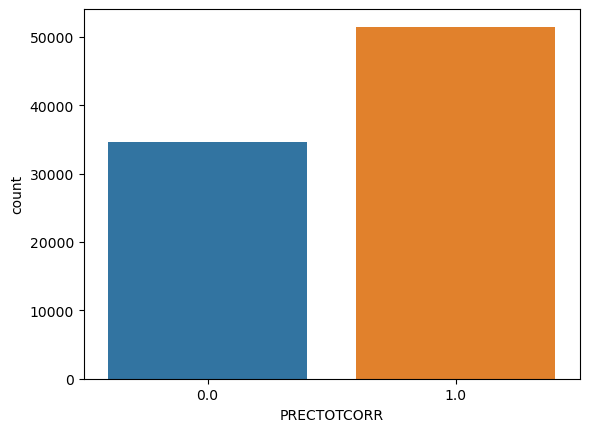

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("salem-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,24.62,1.0,5,1,6,2011,89.31,6.12,6.12
1,25.55,1.0,6,1,6,2011,84.44,5.40,5.40
2,26.97,0.0,7,1,6,2011,76.25,6.34,6.34
3,28.66,0.0,8,1,6,2011,65.25,7.02,7.02
4,30.11,0.0,9,1,6,2011,56.94,7.06,7.06
...,...,...,...,...,...,...,...,...,...
86203,28.98,1.0,0,1,4,2021,60.94,4.51,4.51
86204,28.47,1.0,1,1,4,2021,65.31,4.23,4.23
86205,27.98,1.0,2,1,4,2021,69.19,4.00,4.00
86206,27.55,1.0,3,1,4,2021,72.44,3.84,3.84
